In [1]:
#import-libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#load-dataset
df = pd.read_csv(r"D:\finance_economics_dataset.csv")
df


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [2]:
#data-cleaning
df.isnull().sum()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

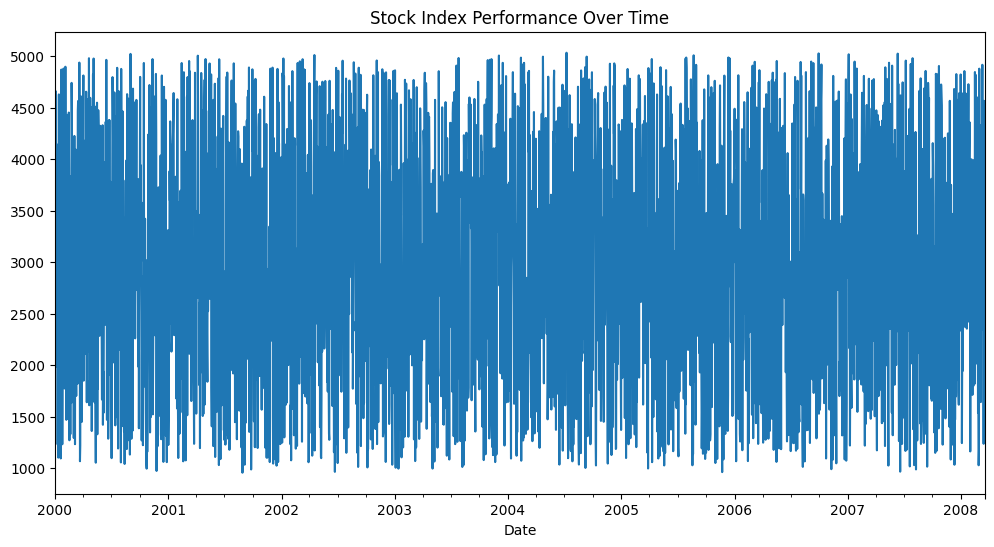

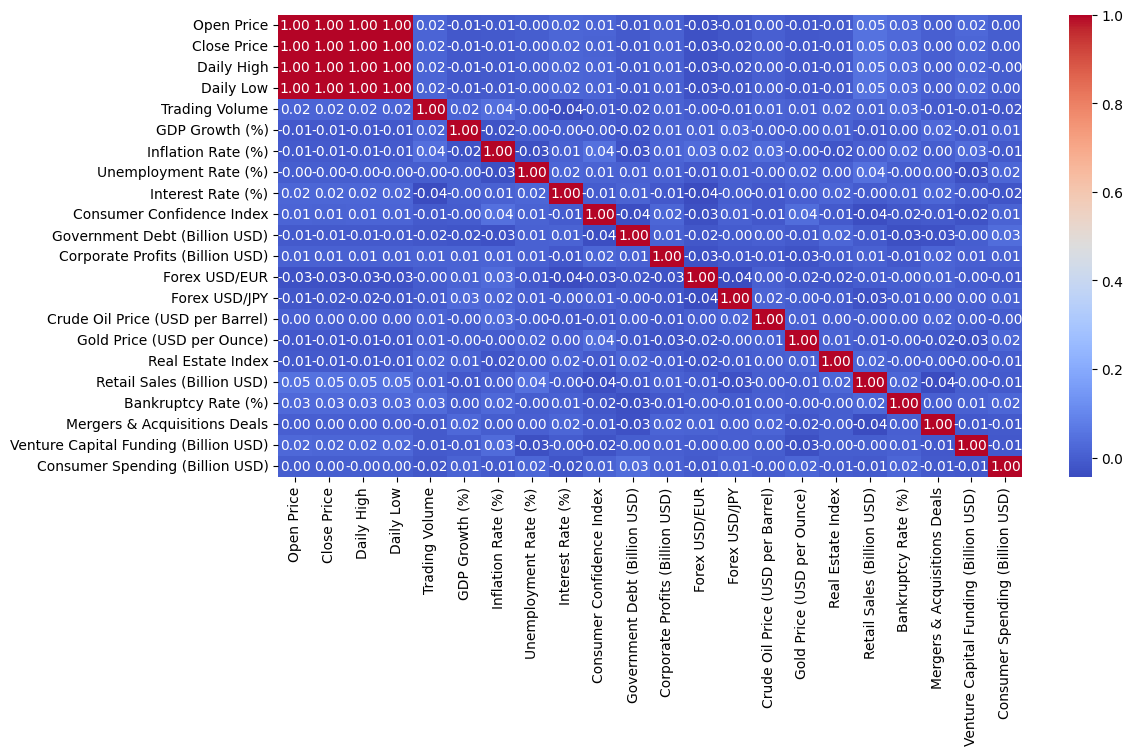

In [ ]:
#Stock Market Performance Analysis
if 'Date' not in df.columns:
	df.reset_index(inplace=True)  
	if 'Date' not in df.columns:
		raise KeyError("The 'Date' column is missing from the dataframe. Please ensure the dataframe contains a 'Date' column.")

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot stock index over time
plt.figure(figsize=(12, 6))
df["Close Price"].plot(title="Stock Index Performance Over Time")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=[np.number]) 
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

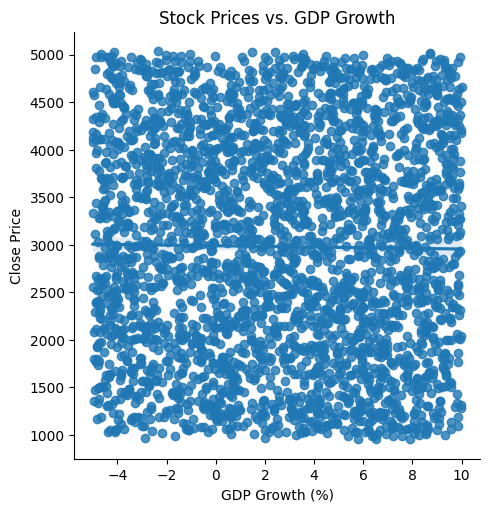

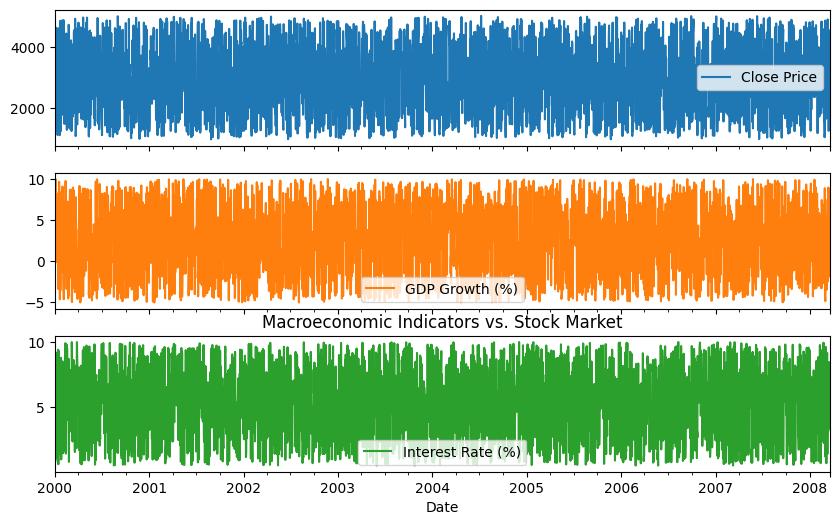

In [8]:
#Impact of Macroeconomic Factors on Stock Market
import seaborn as sns

# Scatter plot: Stock Market vs. GDP Growth
sns.lmplot(x="GDP Growth (%)", y="Close Price", data=df)
plt.title("Stock Prices vs. GDP Growth")
plt.show()

# Line plot to compare trends
df[["Close Price", "GDP Growth (%)", "Interest Rate (%)"]].plot(subplots=True, figsize=(10, 6))
plt.title("Macroeconomic Indicators vs. Stock Market")
plt.show()

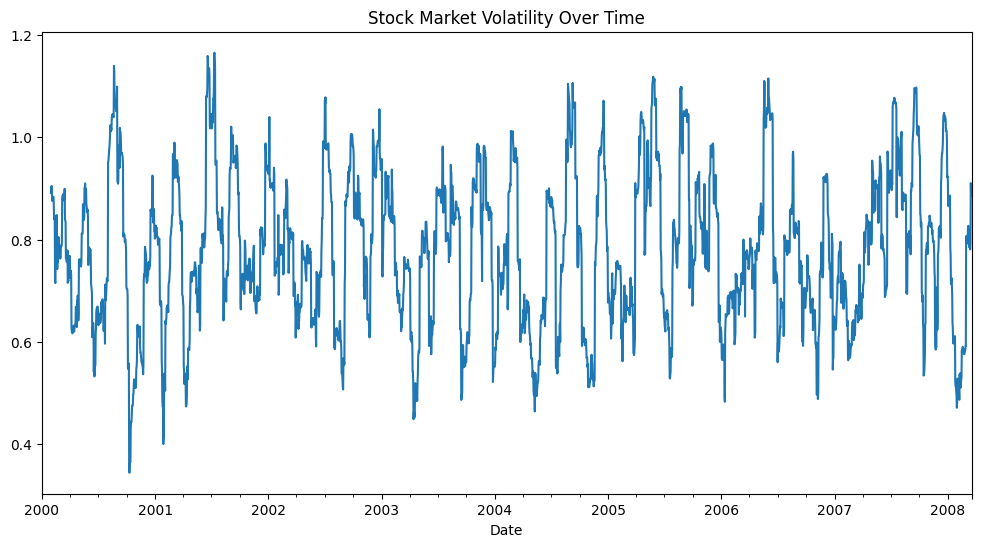

In [9]:
#Market Volatility Analysis
df["Daily Returns"] = df["Close Price"].pct_change()  # Calculate daily return percentage
df["Volatility"] = df["Daily Returns"].rolling(30).std()  # 30-day rolling volatility

plt.figure(figsize=(12, 6))
df["Volatility"].plot(title="Stock Market Volatility Over Time")
plt.show()

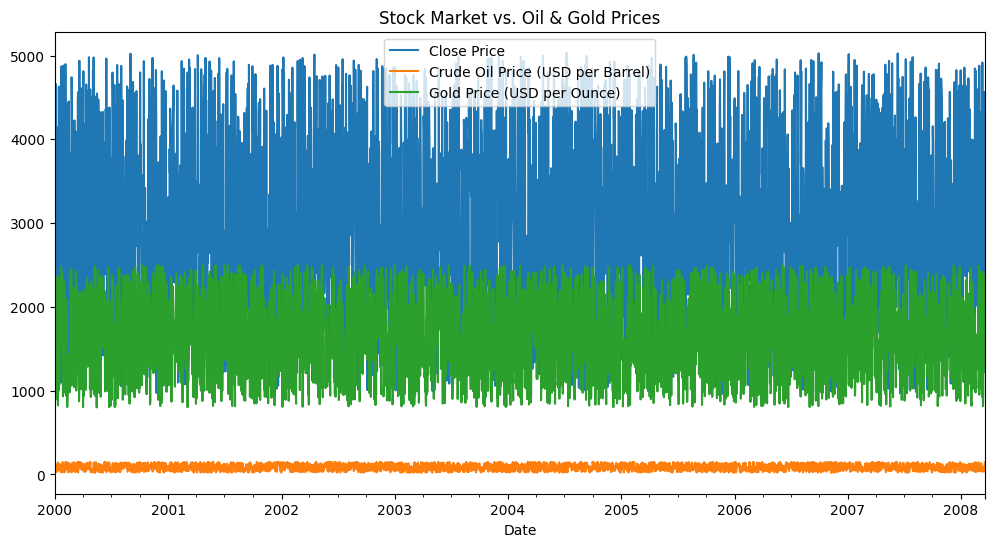

In [10]:
#Oil, Gold & Forex Market Influence
df[["Close Price", "Crude Oil Price (USD per Barrel)", "Gold Price (USD per Ounce)"]].plot(figsize=(12,6))
plt.title("Stock Market vs. Oil & Gold Prices")
plt.show()

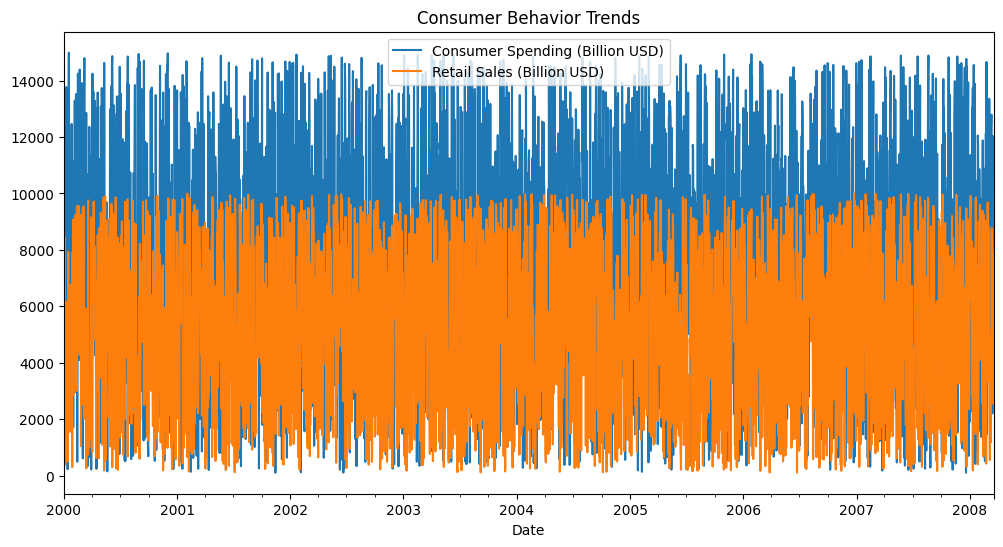

In [11]:
#Consumer & Corporate Behavior Insights
df[["Consumer Spending (Billion USD)", "Retail Sales (Billion USD)"]].plot(figsize=(12,6))
plt.title("Consumer Behavior Trends")
plt.show()

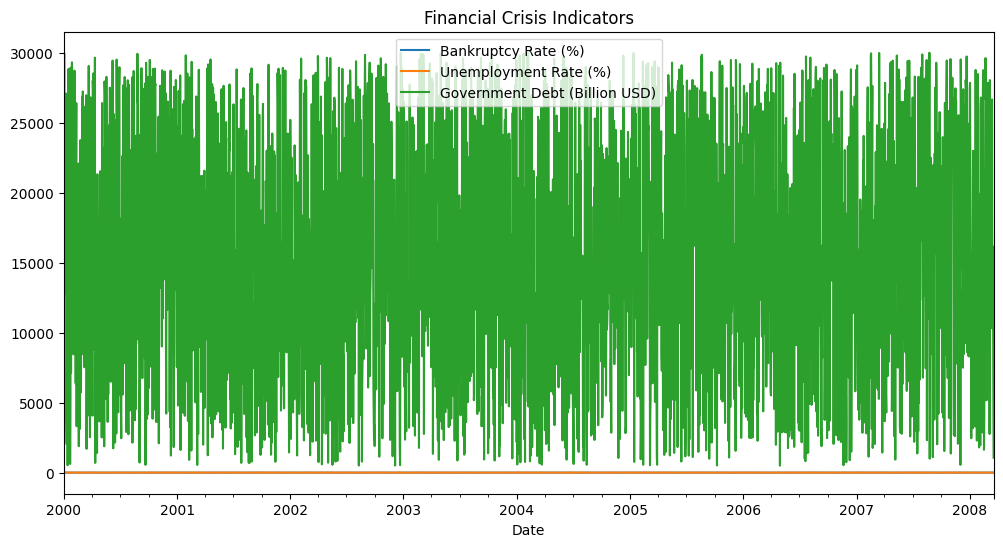

In [12]:
#Financial Crisis Detection
df[["Bankruptcy Rate (%)", "Unemployment Rate (%)", "Government Debt (Billion USD)"]].plot(figsize=(12,6))
plt.title("Financial Crisis Indicators")
plt.show()


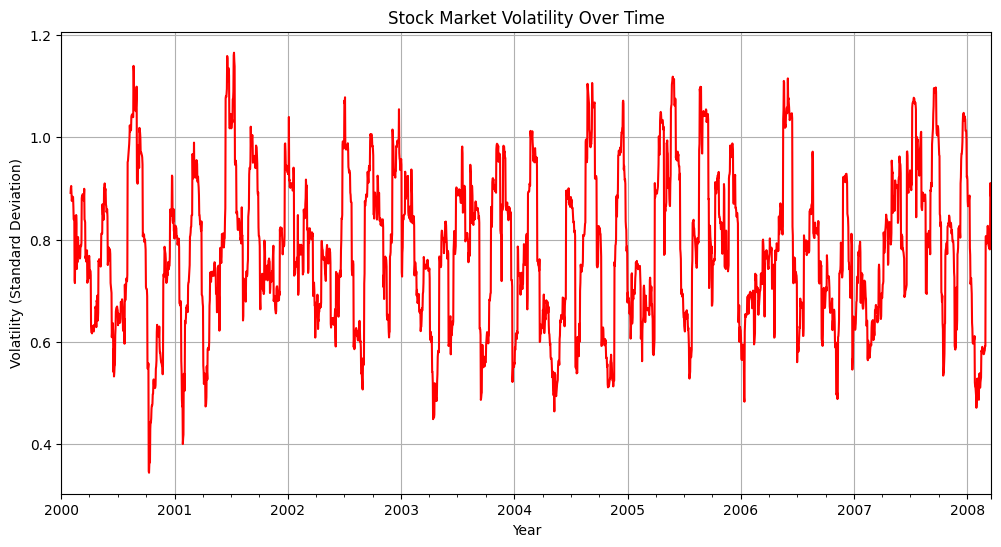

In [17]:
#Daily Returns & Volatility
df["Daily Returns"] = df["Close Price"].pct_change()  # Calculate daily returns
df["Volatility"] = df["Daily Returns"].rolling(30).std()  # 30-day rolling volatility

plt.figure(figsize=(12, 6))
df["Volatility"].plot(title="Stock Market Volatility Over Time", color="r")
plt.xlabel("Year")
plt.ylabel("Volatility (Standard Deviation)")
plt.grid()
plt.show()


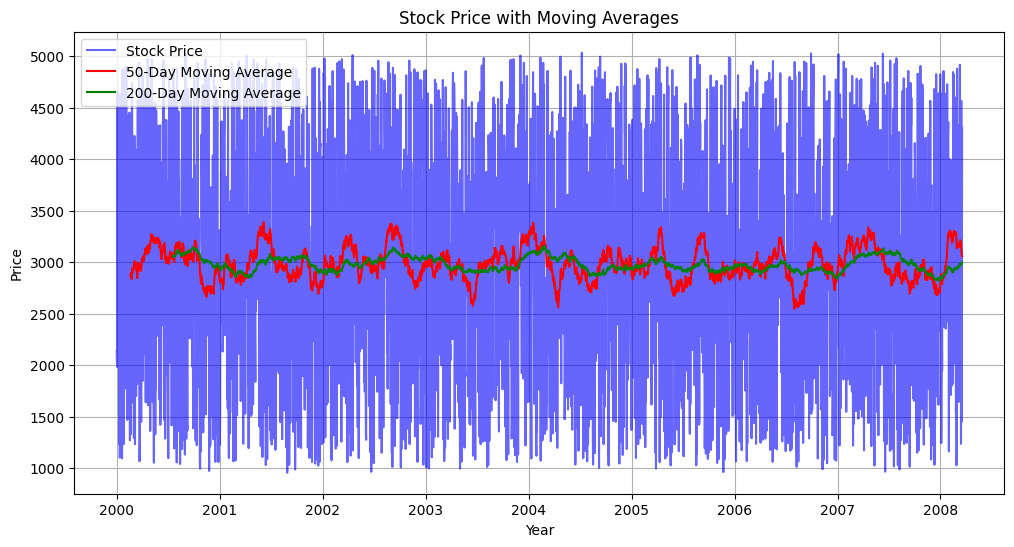

In [18]:
 #Moving Averages
df["SMA_50"] = df["Close Price"].rolling(window=50).mean()  # Short-term trend
df["SMA_200"] = df["Close Price"].rolling(window=200).mean()  # Long-term trend

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close Price"], label="Stock Price", color="blue", alpha=0.6)
plt.plot(df.index, df["SMA_50"], label="50-Day Moving Average", color="red")
plt.plot(df.index, df["SMA_200"], label="200-Day Moving Average", color="green")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


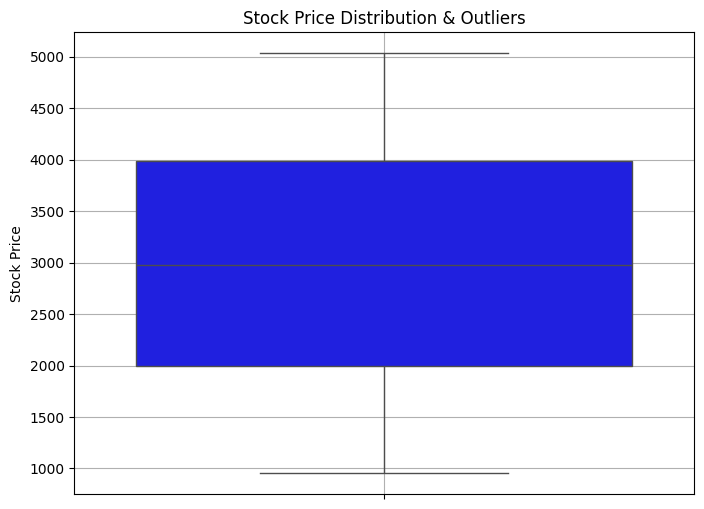

In [20]:
#Price Distribution & Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Close Price"], color="blue")
plt.title("Stock Price Distribution & Outliers")
plt.ylabel("Stock Price")
plt.grid()
plt.show()


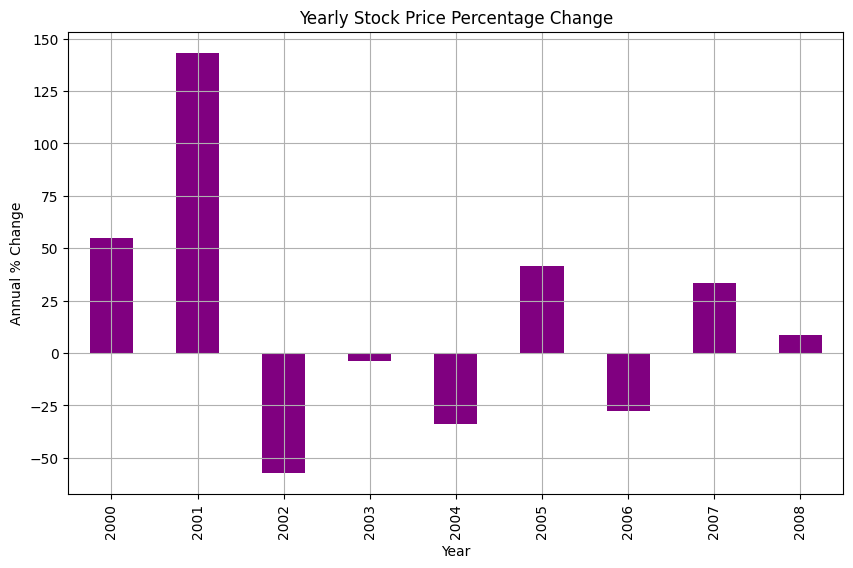

In [21]:
#Yearly Price Change Analysis
df["Year"] = df.index.year
yearly_returns = df.groupby("Year")["Close Price"].agg(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

plt.figure(figsize=(10, 6))
yearly_returns.plot(kind="bar", color="purple")
plt.title("Yearly Stock Price Percentage Change")
plt.xlabel("Year")
plt.ylabel("Annual % Change")
plt.grid()
plt.show()
